In [47]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from citipy import citipy as cp
import requests as req
import time
from math import sqrt
from datetime import datetime
import json


In [6]:
# Create an empty list and counter
city_list = []
count = 0
dup = 'no'

# From citipy load in info into empty list
for x in range(-90,90,1):
    for y in range(-180,180,1):
        city = cp.nearest_city(x,y)
        citidict = {}
        citidict['city'] = city.city_name
        citidict['country'] = city.country_code
        citidict['lat'] = x
        citidict['long'] = y
        if len(city_list) == 0:
            city_list.append(citidict)
            count += 1
            continue
        else: # to avoid duplicate cities
            for city in city_list:
                if city['city'] == citidict['city']:
                    dup = 'yes'
        if dup == 'no':
            city_list.append(citidict)
            count += 1
        else:
            dup = 'no'

print(len(city_list))

7957


In [8]:
# Create df 
city_df = pd.DataFrame({
    'city':[x['city'] for x in city_list],
    'country':[x['country'] for x in city_list]
})

city_df.head()

,city,country
0,vaini,to
1,mataura,pf
2,rikitea,pf
3,punta arenas,cl
4,ushuaia,ar


In [10]:
# Amend df to allow for 500 samples
sample_city = city_df.sample(500)
sample_city.head()

,city,country
4353,hanzhong,cn
6126,drochia,md
7464,verkhoturye,ru
841,vazante,br
4220,wilmington island,us


In [14]:
# Load API key and info
w_key = ''
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'Imperial'
count = 0

# Add Columns to df
sample_city['latitude'] = ''
sample_city['longitude'] = ''
sample_city['temperature'] = ''
sample_city['humidity'] = ''
sample_city['cloudiness'] = ''
sample_city['wind_speed'] = ''

# Load from city information from openweathermap
for index,row in sample_city.iterrows():
    count += 1
    query_url = url + 'appid=' + w_key + '&units=' + units + '&q=' + row['city']
    try:
        weather_response = req.get(query_url)
        city_weather = weather_response.json()
        
        sample_city.set_value(index,'latitude',int(city_weather['coord']['lat']))
        sample_city.set_value(index,'longitude',int(city_weather['coord']['lat']))
        sample_city.set_value(index,'temperature',int(city_weather['main']['temp']))
        sample_city.set_value(index,'humidity', int(city_weather['main']['humidity']))
        sample_city.set_value(index,'cloudiness', int(city_weather['clouds']['all']))
        sample_city.set_value(index,'wind_speed', int(city_weather['wind']['speed']))
    except:
    print(f"No data for this city: {row['city']}")
    print(f"This is city#: {count}")
    print(f"This is: {row['city']}" )
    print(f"This is the requested URL: {query_url}")
        
        
        
        
        
        
        

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_l

No data for this city: orgun
This is city#: 7
This is : [row["city"]]
This is the requested URL: [query_url]
No data for this city: karamea
This is city#: 19
This is : [row["city"]]
This is the requested URL: [query_url]
No data for this city: zlatoustovsk
This is city#: 20
This is : [row["city"]]
This is the requested URL: [query_url]
No data for this city: paytug
This is city#: 29
This is : [row["city"]]
This is the requested URL: [query_url]
No data for this city: kargapolye
This is city#: 51
This is : [row["city"]]
This is the requested URL: [query_url]
No data for this city: coulihaut
This is city#: 59
This is : [row["city"]]
This is the requested URL: [query_url]
No data for this city: aban
This is city#: 78
This is : [row["city"]]
This is the requested URL: [query_url]
No data for this city: blensong
This is city#: 85
This is : [row["city"]]
This is the requested URL: [query_url]
No data for this city: cuyo
This is city#: 98
This is : [row["city"]]
This is the requested URL: [qu

In [16]:
# drop cities that have NaN
sample_city = sample_city[sample_city != '']
sample_city['latitude'] = sample_city['latitude'].fillna(0)
sample_city['longitude'] = sample_city['longitude'].fillna(0)
sample_city['temperature'] = sample_city['temperature'].fillna(0)
sample_city['humidity'] = sample_city['humidity'].fillna(0)
sample_city['cloudiness'] = sample_city['cloudiness'].fillna(0)
sample_city['wind_speed'] = sample_city['wind_speed'].fillna(0)
sample_city

,city,country,latitude,longitude,temperature,humidity,cloudiness,wind_speed
4353,hanzhong,cn,33,33,67,70,100,1
6126,drochia,md,48,48,64,65,20,8
7464,verkhoturye,ru,58,58,45,73,0,7
841,vazante,br,-17,-17,75,65,32,2
4220,wilmington island,us,32,32,86,45,75,12
6808,tselinnoye,ru,45,45,62,90,0,5
4340,orgun,af,0,0,0,0,0,0
1267,uaua,br,-9,-9,81,44,0,7
3061,paitan,ph,23,23,77,94,75,11
1359,uige,ao,-7,-7,62,53,0,4


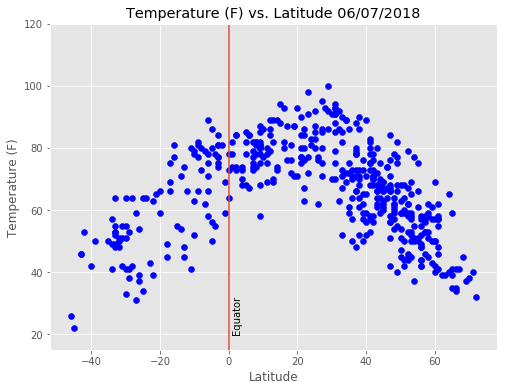

In [59]:
# Plot scatter graphs 
date = time.strftime('%m/%d/%Y')

x = sample_city['latitude']
y = sample_city['temperature']

plt.figure(figsize = (8,6))


plt.scatter(x,y, color = 'blue')
plt.ylim(15,120)
plt.title(f"Temperature (F) vs. Latitude {date}")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.style.use('ggplot')
plt.axvline(x = 0)
plt.text(1,30,'Equator', rotation = 90)
plt.savefig('TempvLat')
plt.show()

<function matplotlib.pyplot.show>

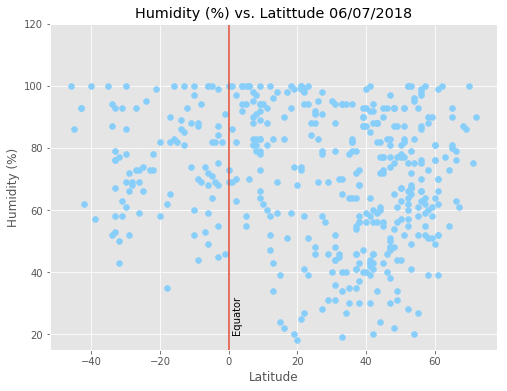

In [61]:
x = sample_city['latitude']
y = sample_city['humidity']

plt.figure(figsize = (8,6))

plt.ylim(15,120)
plt.scatter(x,y, color = 'lightskyblue')
plt.title(f"Humidity (%) vs. Latittude {date}")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.style.use('ggplot')
plt.axvline(x = 0)
plt.text(1,30,'Equator', rotation = 90)
plt.savefig('Humidity_v_Latitude')
plt.show

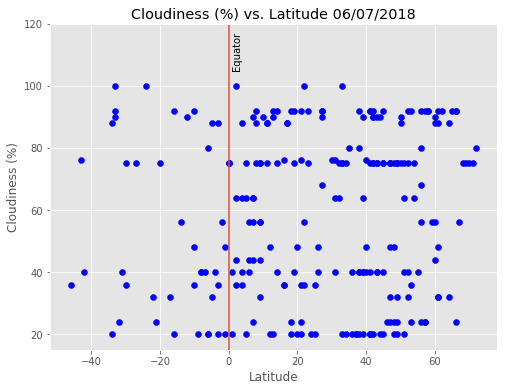

In [62]:
x = sample_city['latitude']
y = sample_city['cloudiness']

plt.figure(figsize = (8,6))

plt.ylim(15,120)
plt.scatter(x,y, color = 'blue')
plt.title(f"Cloudiness (%) vs. Latitude {date}")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.axvline(x = 0)
plt.text(1,115,'Equator', rotation = 90)
plt.style.use('ggplot')
plt.savefig('Cloudiness_v_Latitude')
plt.show()

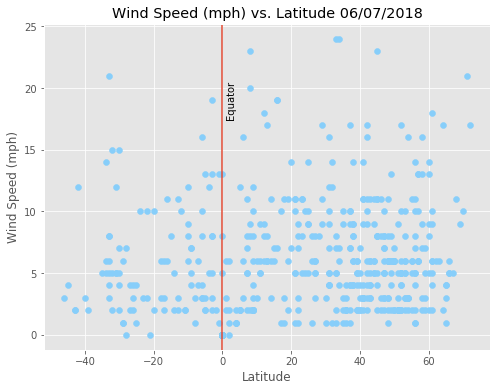

In [63]:
x = sample_city['latitude']
y = sample_city['wind_speed']

plt.figure(figsize = (8,6))

plt.scatter(x,y,color = 'lightskyblue')
plt.title(f"Wind Speed (mph) vs. Latitude {date}")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.axvline(x = 0)
plt.style.use('ggplot')
plt.text(1,20,'Equator', rotation = 90)
plt.savefig('windspeed_v_latitutde')
plt.show()

In [31]:
sample_city = sample_city[sample_city != '']

sample_city.to_csv('sample_weather.csv', encoding = 'utf-8', index = False)
df = pd.read_csv('sample_weather.csv')

df.head()

,city,country,latitude,longitude,temperature,humidity,cloudiness,wind_speed
0,hanzhong,cn,33,33,67,70,100,1
1,drochia,md,48,48,64,65,20,8
2,verkhoturye,ru,58,58,45,73,0,7
3,vazante,br,-17,-17,75,65,32,2
4,wilmington island,us,32,32,86,45,75,12
